# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')


In [93]:
data=pd.read_csv(r"C:\Users\Sarthak\OneDrive\Desktop\data.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825.0,no,no,cellular,17.0,nov,977.0,3.0,-1.0,0.0,unknown,yes
45207,71,retired,divorced,primary,no,1729.0,no,no,cellular,17.0,nov,456.0,2.0,-1.0,0.0,unknown,yes
45208,72,retired,married,secondary,no,5715.0,no,no,cellular,17.0,nov,1127.0,5.0,184.0,3.0,success,yes
45209,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17.0,nov,508.0,4.0,-1.0,0.0,unknown,no


# Statistical Analysis

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45200 non-null  object 
 2   marital    45192 non-null  object 
 3   education  45197 non-null  object 
 4   default    45195 non-null  object 
 5   balance    45200 non-null  float64
 6   housing    45188 non-null  object 
 7   loan       45181 non-null  object 
 8   contact    45165 non-null  object 
 9   day        45179 non-null  float64
 10  month      45177 non-null  object 
 11  duration   45180 non-null  float64
 12  campaign   45186 non-null  float64
 13  pdays      45178 non-null  float64
 14  previous   45186 non-null  float64
 15  poutcome   45209 non-null  object 
 16  y          45203 non-null  object 
dtypes: float64(6), int64(1), object(10)
memory usage: 5.9+ MB


In [96]:
catvar=data.select_dtypes(include='object')
for i in catvar :
    print(i,':',data[i].nunique(),'\n')

job : 12 

marital : 3 

education : 4 

default : 2 

housing : 2 

loan : 2 

contact : 3 

month : 12 

poutcome : 4 

y : 2 



In [97]:
catvar=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y']
for i in catvar :
    print(data[i].value_counts(),'\n')

job
blue-collar      9728
management       9456
technician       7597
admin.           5170
services         4151
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1302
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64 

marital
married     27203
single      12786
divorced     5203
Name: count, dtype: int64 

education
secondary    23194
tertiary     13297
primary       6850
unknown       1856
Name: count, dtype: int64 

default
no     44380
yes      815
Name: count, dtype: int64 

housing
yes    25122
no     20066
Name: count, dtype: int64 

loan
no     37941
yes     7240
Name: count, dtype: int64 

contact
cellular     29274
unknown      12985
telephone     2906
Name: count, dtype: int64 

month
may    13757
jul     6895
aug     6247
jun     5316
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64 

poutcome
unknown    36958
failure 

In [98]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45200.000000,45179.000000,45180.000000,45186.000000,45178.000000,45186.000000
mean,40.936210,1362.303628,15.813741,258.119124,2.764263,40.218403,0.580290
std,10.618762,3045.002461,8.320851,257.332532,3.098740,100.155473,2.303464
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [99]:
data.isnull().sum()

age           0
job          11
marital      19
education    14
default      16
balance      11
housing      23
loan         30
contact      46
day          32
month        34
duration     31
campaign     25
pdays        33
previous     25
poutcome      2
y             8
dtype: int64

In [100]:
data=data.dropna()

In [101]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Exploratory Data Analysis

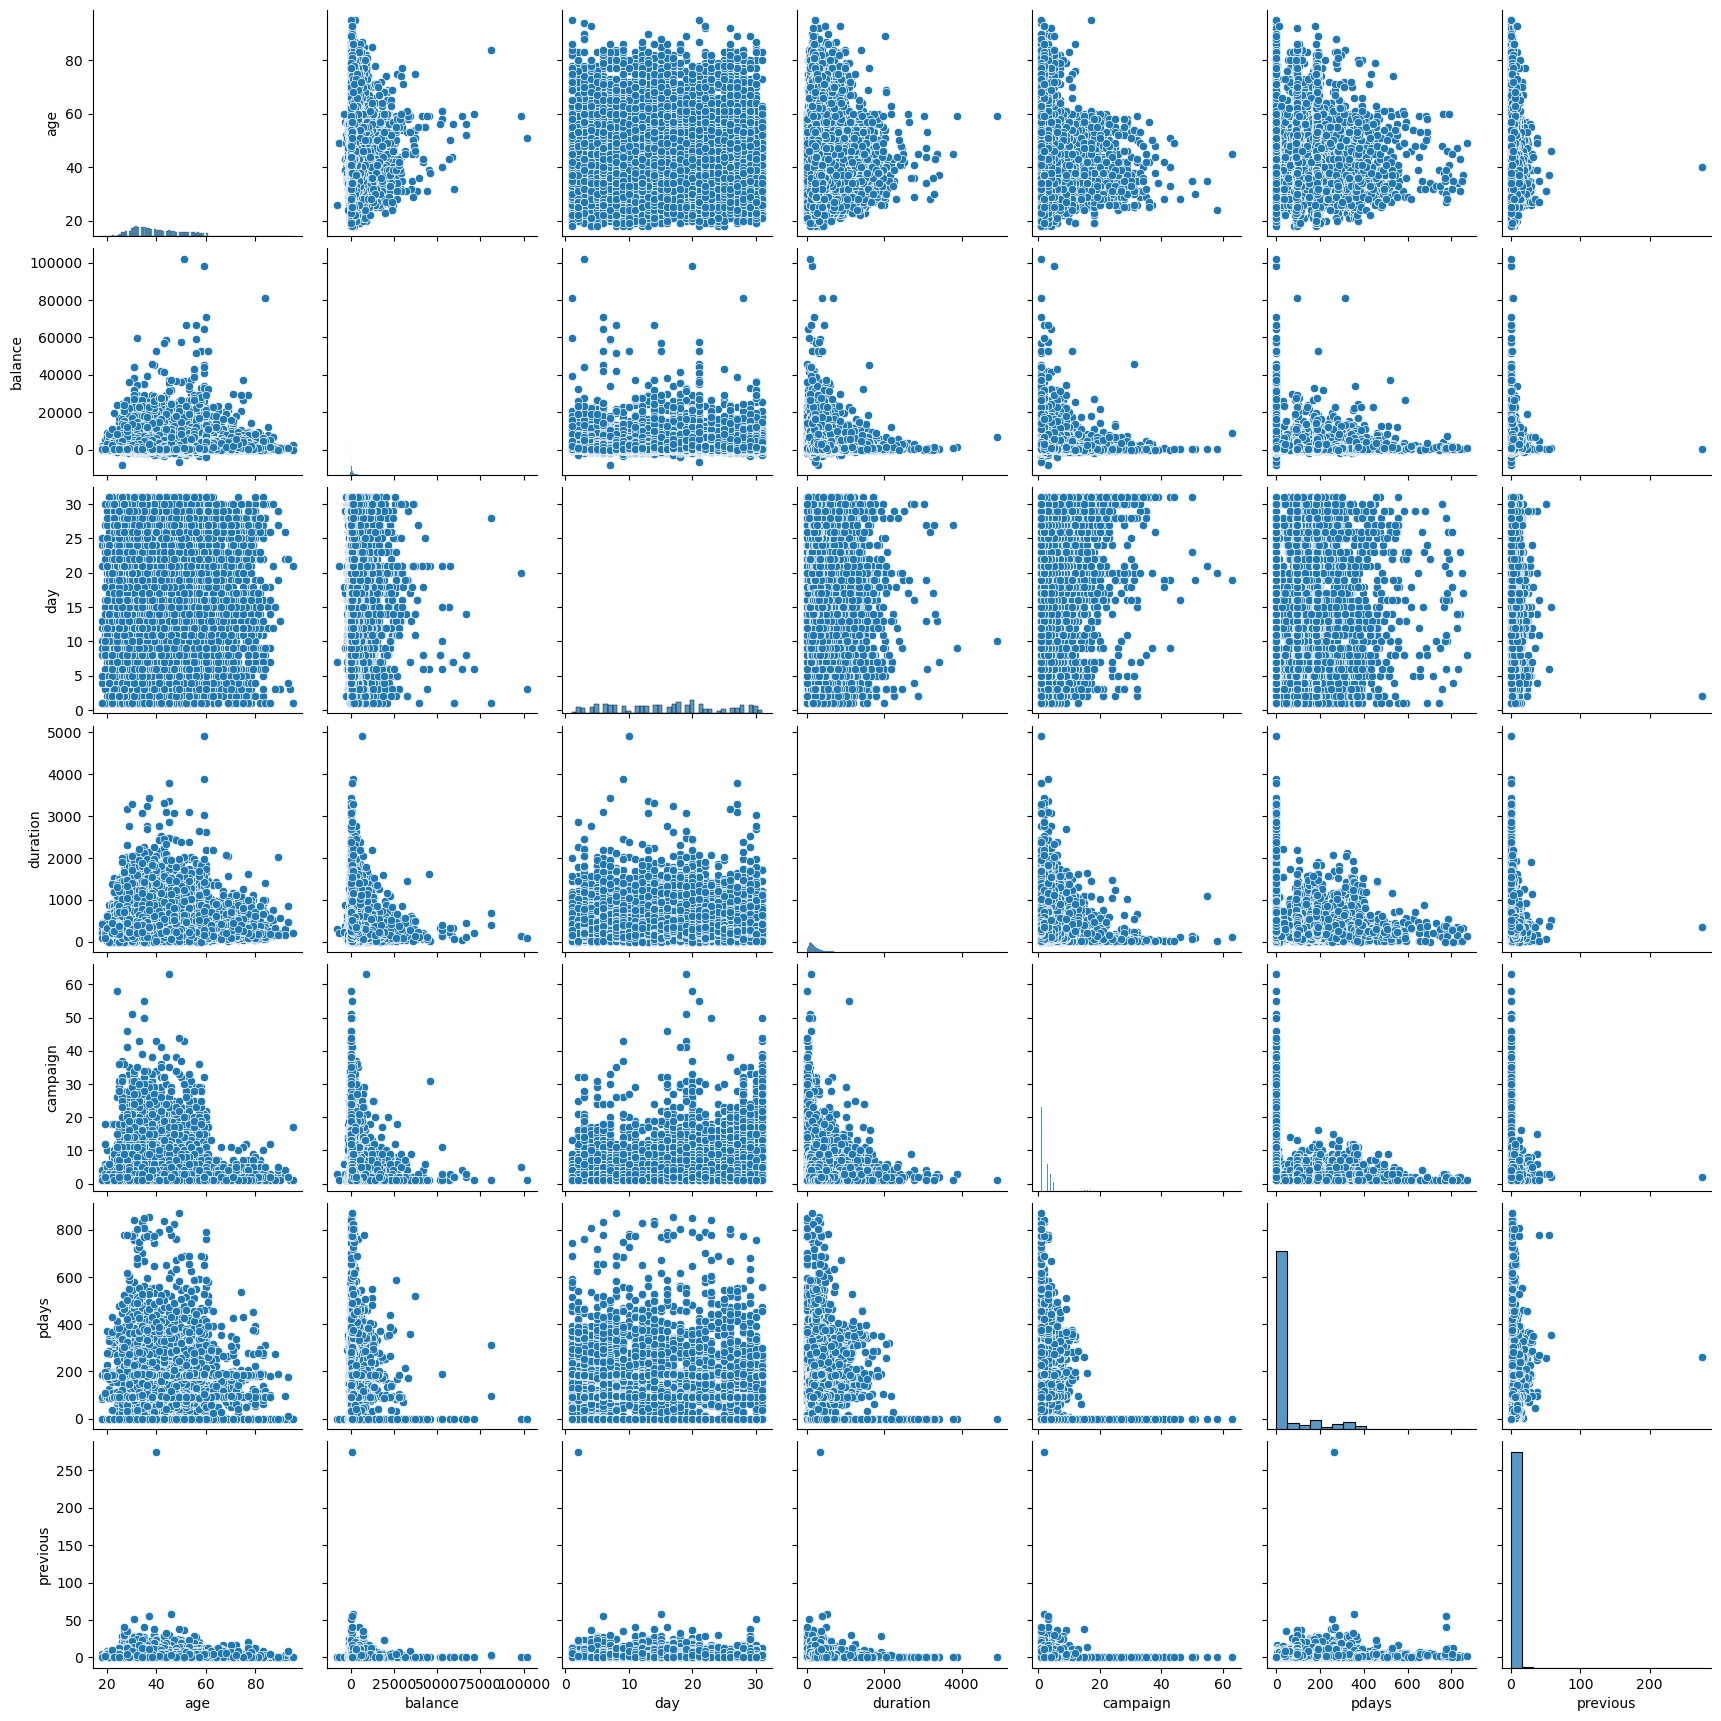

In [103]:
sns.pairplot(data)

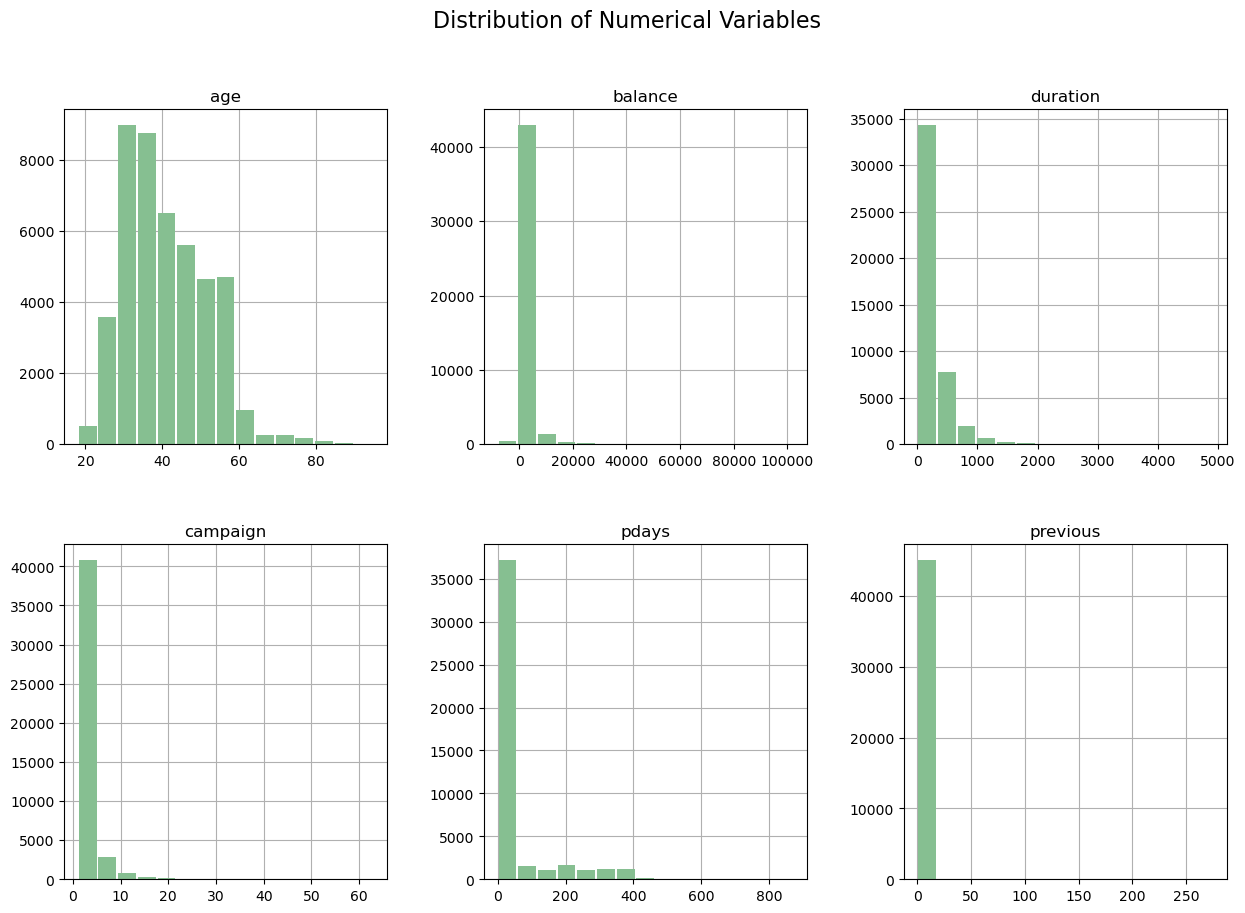

In [104]:
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
data[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(2, 3), color='#86bf91', zorder=2, rwidth=0.9)
plt.suptitle('Distribution of Numerical Variables', fontsize=16)
plt.show()

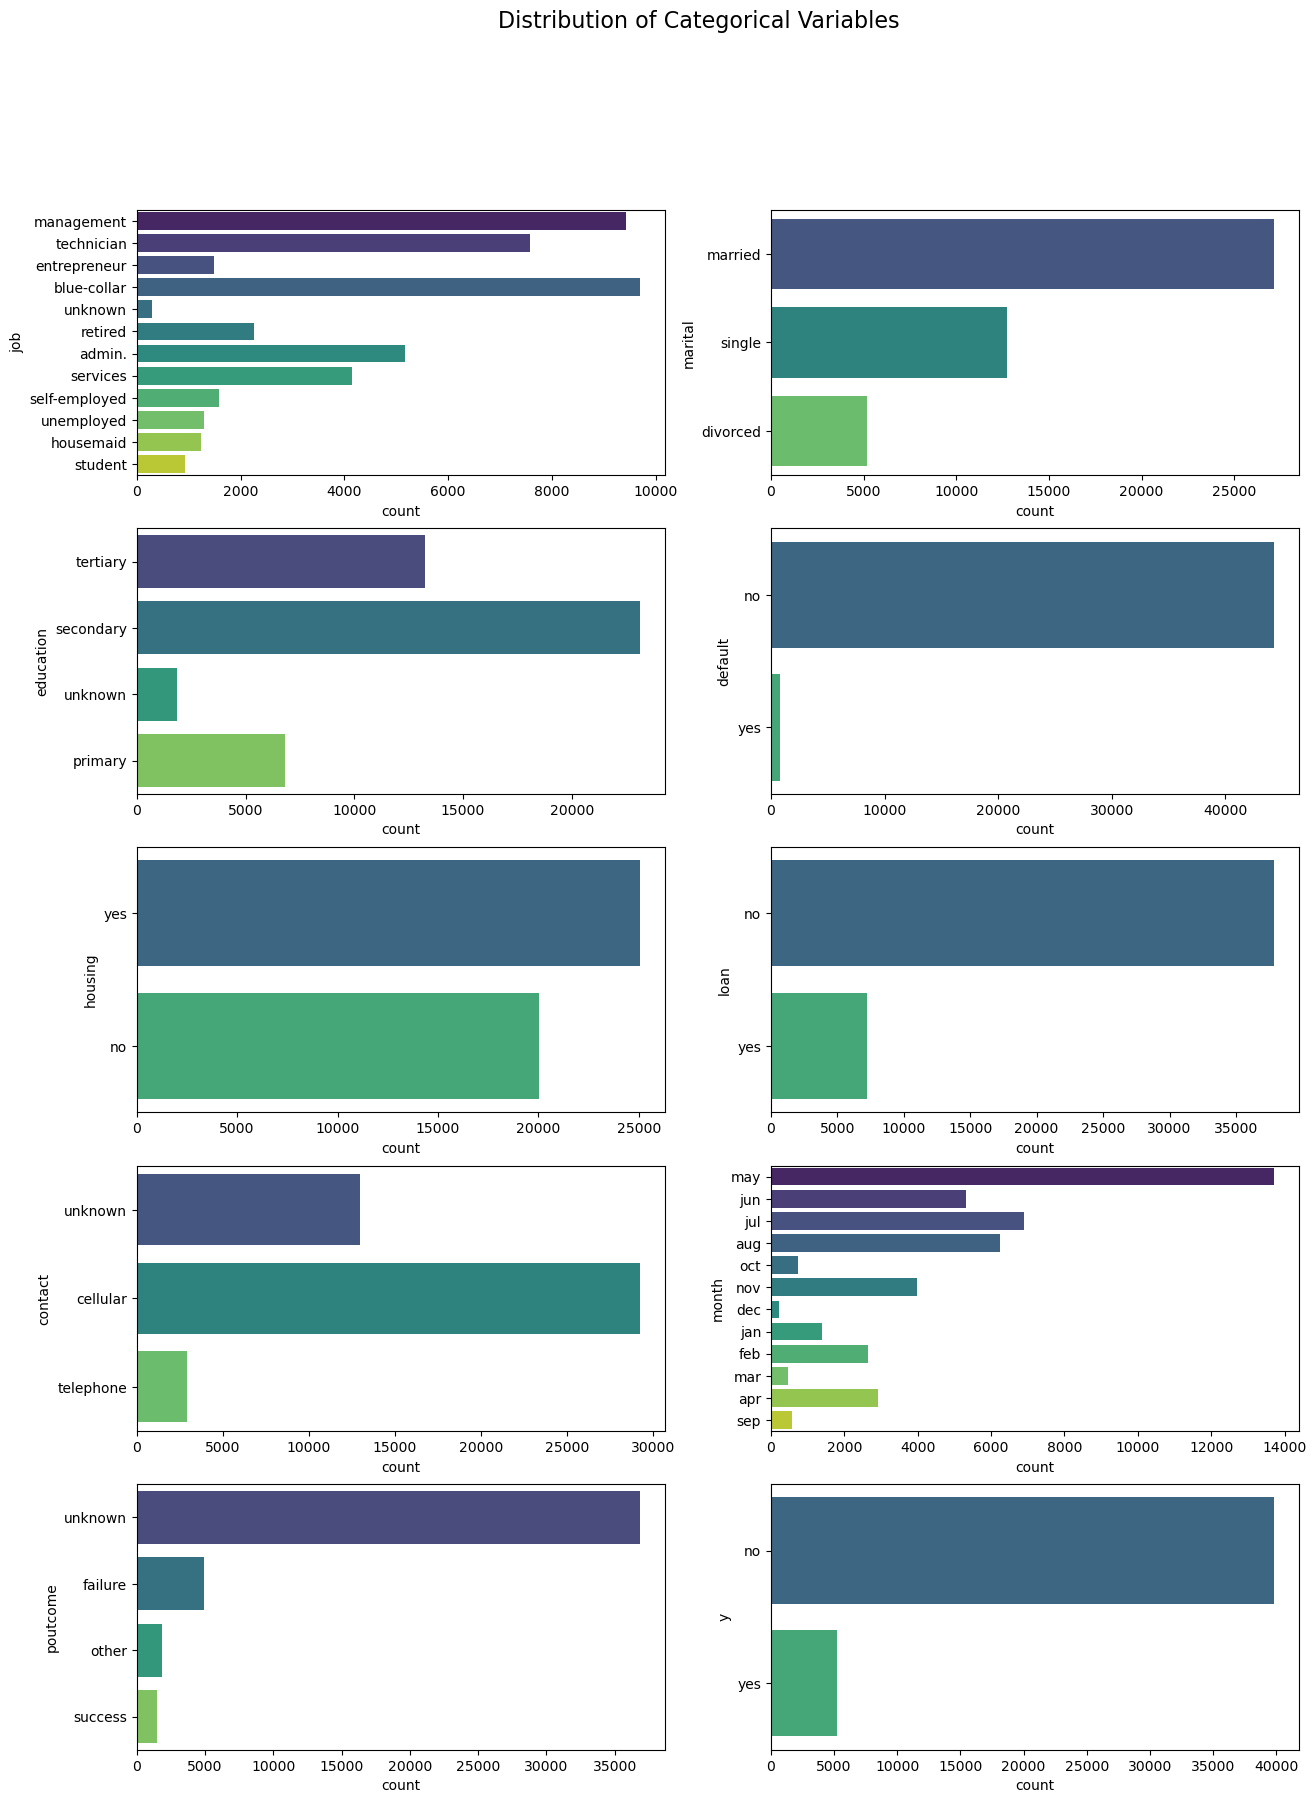

In [105]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

fig, axes = plt.subplots(5, 2, figsize=(15, 20))
for i, col in enumerate(categorical_columns):
    sns.countplot(y=col, data=data, ax=axes[i//2, i%2], palette='viridis')
plt.suptitle('Distribution of Categorical Variables', fontsize=16)
plt.show()

# Converting Caterogical Column into Numeric

In [107]:
df= data.copy()
for i in categorical_columns: 
    le = LabelEncoder()
    df[i] = le.fit_transform(data[i])
    

In [108]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143.0,1,0,2,5.0,8,261.0,1.0,-1.0,0.0,3,0
1,44,9,2,1,0,29.0,1,0,2,5.0,8,151.0,1.0,-1.0,0.0,3,0
2,33,2,1,1,0,2.0,1,1,2,5.0,8,76.0,1.0,-1.0,0.0,3,0


In [109]:
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


<Axes: >

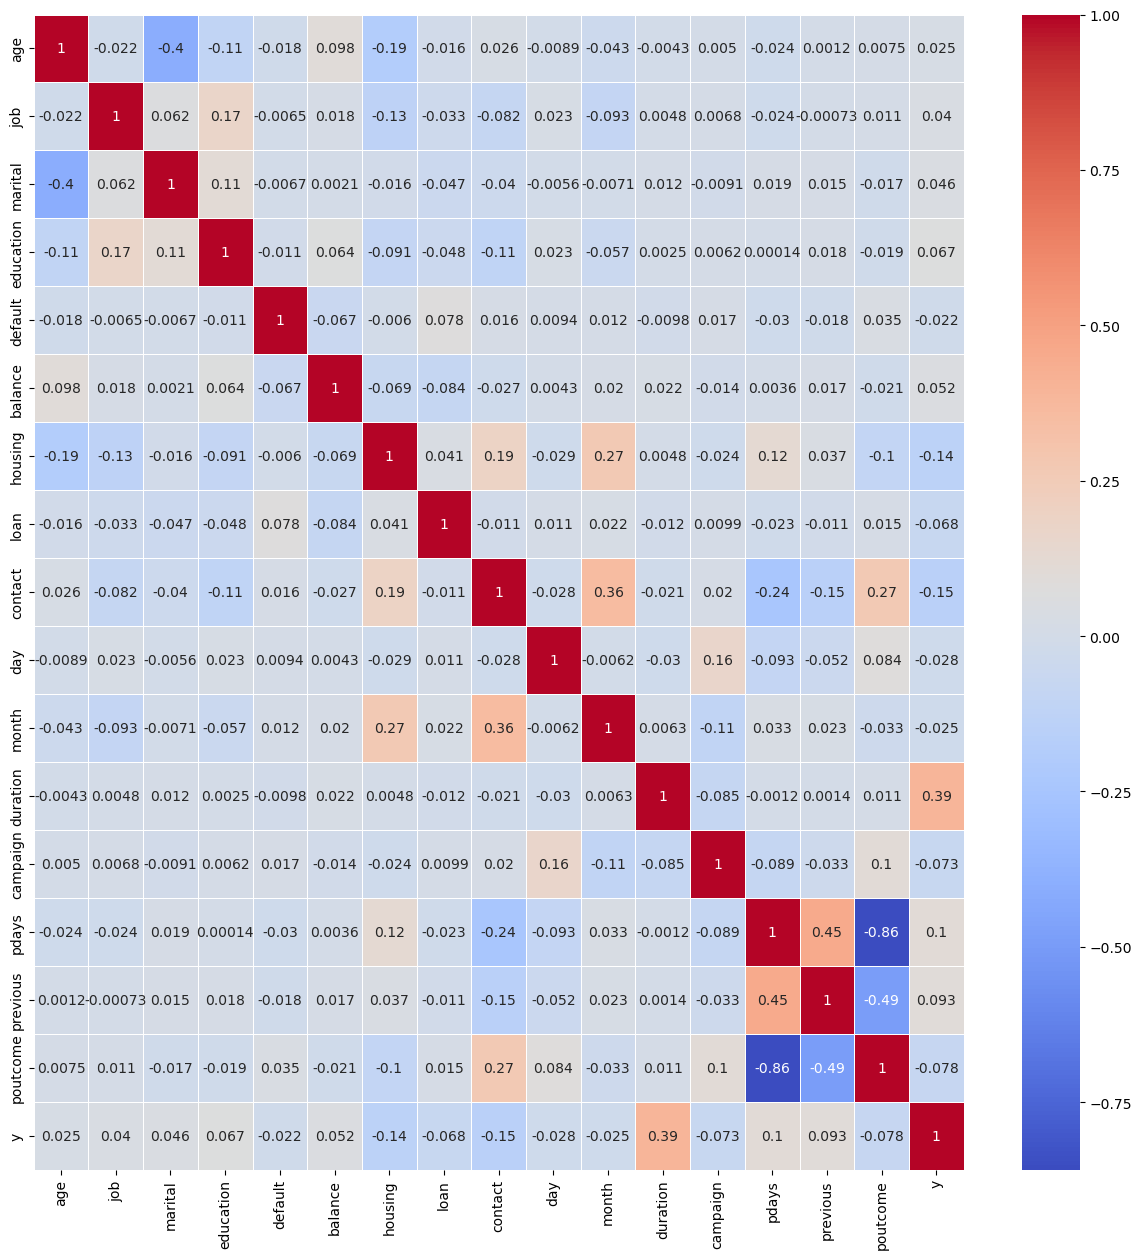

In [110]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.5 ,cmap='coolwarm')

In [112]:
# Define features and target
x = df.drop(columns='y') # Independent Variable
y = df['y'] # Dependent Variable

In [114]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143.0,1,0,2,5.0,8,261.0,1.0,-1.0,0.0,3
1,44,9,2,1,0,29.0,1,0,2,5.0,8,151.0,1.0,-1.0,0.0,3
2,33,2,1,1,0,2.0,1,1,2,5.0,8,76.0,1.0,-1.0,0.0,3
3,47,1,1,3,0,1506.0,1,0,2,5.0,8,92.0,1.0,-1.0,0.0,3
4,33,11,2,3,0,1.0,0,0,2,5.0,8,198.0,1.0,-1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825.0,0,0,0,17.0,9,977.0,3.0,-1.0,0.0,3
45207,71,5,0,0,0,1729.0,0,0,0,17.0,9,456.0,2.0,-1.0,0.0,3
45208,72,5,1,1,0,5715.0,0,0,0,17.0,9,1127.0,5.0,184.0,3.0,2
45209,57,1,1,1,0,668.0,0,0,1,17.0,9,508.0,4.0,-1.0,0.0,3


In [115]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45098, dtype: int32

# Train Test Split

In [118]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [120]:
x_train.shape

(31568, 16)

In [121]:
x_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
6400,30,9,2,2,0,445.0,1,0,2,27.0,8,182.0,1.0,-1.0,0.0,3
5657,43,1,1,1,0,470.0,1,1,2,26.0,8,185.0,1.0,-1.0,0.0,3
32032,82,3,1,0,0,2140.0,0,0,1,14.0,0,118.0,6.0,-1.0,0.0,3
39191,43,7,2,1,0,-63.0,1,0,0,18.0,8,92.0,3.0,374.0,1.0,1
12517,32,1,2,1,0,-255.0,0,1,2,2.0,5,957.0,3.0,-1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11354,60,2,1,0,0,987.0,0,0,2,19.0,6,102.0,13.0,-1.0,0.0,3
44845,40,2,1,1,0,6403.0,0,0,0,22.0,11,208.0,2.0,-1.0,0.0,3
38251,31,9,1,2,0,-256.0,1,0,0,15.0,8,272.0,1.0,365.0,5.0,0
876,37,11,2,3,0,414.0,1,0,2,7.0,8,131.0,1.0,-1.0,0.0,3


In [122]:
x_test.shape

(13530, 16)

In [124]:
x_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
22264,51,3,1,2,0,990.0,0,0,1,21.0,1,189.0,5.0,-1.0,0.0,3
6116,36,4,1,2,0,293.0,1,0,2,27.0,8,287.0,4.0,-1.0,0.0,3
25350,51,4,0,2,0,1937.0,1,0,0,18.0,9,185.0,4.0,152.0,11.0,1
29064,43,4,0,1,0,51.0,0,0,0,2.0,3,430.0,1.0,-1.0,0.0,3
12535,44,1,1,1,0,701.0,0,1,2,3.0,5,269.0,2.0,-1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15602,51,0,1,1,0,0.0,0,0,0,21.0,5,130.0,1.0,-1.0,0.0,3
24056,30,9,1,2,0,239.0,0,0,1,20.0,10,73.0,1.0,-1.0,0.0,3
45071,27,10,2,1,0,771.0,0,0,0,21.0,10,181.0,1.0,302.0,3.0,1
17512,36,4,2,2,0,8.0,0,0,0,29.0,5,858.0,7.0,-1.0,0.0,3


In [125]:
y_train.shape

(31568,)

In [127]:
y_train

6400     0
5657     0
32032    0
39191    0
12517    0
        ..
11354    0
44845    1
38251    0
876      0
15865    0
Name: y, Length: 31568, dtype: int32

In [129]:
y_test.shape

(13530,)

In [131]:
y_test

22264    0
6116     0
25350    0
29064    1
12535    0
        ..
15602    0
24056    0
45071    1
17512    0
43535    1
Name: y, Length: 13530, dtype: int32

In [132]:
x_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
6400,30,9,2,2,0,445.0,1,0,2,27.0,8,182.0,1.0,-1.0,0.0,3
5657,43,1,1,1,0,470.0,1,1,2,26.0,8,185.0,1.0,-1.0,0.0,3
32032,82,3,1,0,0,2140.0,0,0,1,14.0,0,118.0,6.0,-1.0,0.0,3
39191,43,7,2,1,0,-63.0,1,0,0,18.0,8,92.0,3.0,374.0,1.0,1
12517,32,1,2,1,0,-255.0,0,1,2,2.0,5,957.0,3.0,-1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11354,60,2,1,0,0,987.0,0,0,2,19.0,6,102.0,13.0,-1.0,0.0,3
44845,40,2,1,1,0,6403.0,0,0,0,22.0,11,208.0,2.0,-1.0,0.0,3
38251,31,9,1,2,0,-256.0,1,0,0,15.0,8,272.0,1.0,365.0,5.0,0
876,37,11,2,3,0,414.0,1,0,2,7.0,8,131.0,1.0,-1.0,0.0,3


In [133]:
RFC = RandomForestClassifier(random_state=42)
a=RFC.fit(x_train, y_train)
y_pred= RFC.predict(x_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11970
           1       0.63      0.42      0.51      1560

    accuracy                           0.90     13530
   macro avg       0.78      0.70      0.73     13530
weighted avg       0.89      0.90      0.90     13530



In [134]:
LR= LogisticRegression()
b=LR.fit(x_train, y_train)
ypred= LR.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11970
           1       0.55      0.18      0.27      1560

    accuracy                           0.89     13530
   macro avg       0.72      0.58      0.61     13530
weighted avg       0.86      0.89      0.86     13530



In [135]:
DT= DecisionTreeClassifier()
c=DT.fit(x_train, y_train)
ypredi= DT.predict(x_test)
print(classification_report(y_test,ypredi))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     11970
           1       0.46      0.49      0.47      1560

    accuracy                           0.87     13530
   macro avg       0.69      0.71      0.70     13530
weighted avg       0.88      0.87      0.88     13530



In [136]:
DT_accuracy=accuracy_score(y_test,ypredi)*100
LR_accuracy=accuracy_score(y_test,ypred)*100
RFC_accuracy=accuracy_score(y_test,y_pred)*100

In [137]:
result={'Model':['Decision Tree','Logistic Regression','Random Forest'],
        'Accuracy':[DT_accuracy,LR_accuracy,RFC_accuracy]}
   
Compare=pd.DataFrame(result)
Compare


,Model,Accuracy
0,Decision Tree,87.383592
1,Logistic Regression,88.824834
2,Random Forest,90.480414
